# Warehouse Retail and Sales - EDA

In [1]:
# Importing libraries
import pandas as pd

In [2]:
# Reading csv file
df_warehouse = pd.read_csv("Warehouse_and_Retail_Sales.csv")
df_warehouse.head(10)

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0
5,2020,1,KYSELA PERE ET FILS LTD,100641,CORTENOVA VENETO P/GRIG - 750ML,WINE,2.76,0.0,6.0
6,2020,1,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.08,1.0,1.0
7,2020,1,BROWN-FORMAN BEVERAGES WORLDWIDE,1008,JACK DANIELS COUNTRY COCKTAIL SOUTHERN PEACH -...,BEER,0.00,0.0,2.0
8,2020,1,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,6.41,4.0,0.0
9,2020,1,INTERNATIONAL CELLARS LLC,101117,KSARA CAB - 750ML,WINE,0.33,1.0,2.0


In [3]:
# total de dados gravados
print(f"Total number of data count: {len(df_warehouse)}")

Total number of data count: 307645


In [4]:
df_warehouse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307645 entries, 0 to 307644
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   YEAR              307645 non-null  int64  
 1   MONTH             307645 non-null  int64  
 2   SUPPLIER          307478 non-null  object 
 3   ITEM CODE         307645 non-null  object 
 4   ITEM DESCRIPTION  307645 non-null  object 
 5   ITEM TYPE         307644 non-null  object 
 6   RETAIL SALES      307642 non-null  float64
 7   RETAIL TRANSFERS  307645 non-null  float64
 8   WAREHOUSE SALES   307645 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 21.1+ MB


In [5]:
df_warehouse.rename(columns={"YEAR":"Year","MONTH":"Month","SUPPLIER":"Supplier",
                                           "ITEM CODE":"Item_code","ITEM DESCRIPTION":"Item_description",
                                           "ITEM TYPE":"Item_type","RETAIL SALES":"Retail_sales","RETAIL TRANSFERS":"Retail_transfers",
                                           "WAREHOUSE SALES":"Warehouse_sales"}, inplace=True)

In [6]:
df_warehouse

,Year,Month,Supplier,Item_code,Item_description,Item_type,Retail_sales,Retail_transfers,Warehouse_sales
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0
...,...,...,...,...,...,...,...,...,...
307640,2020,9,BOSTON BEER CORPORATION,98868,SAM ADAMS OCTOBERFEST 1/6K,KEGS,0.00,0.0,54.0
307641,2020,9,GLOBAL OCEAN AND AIR CARGO SERVICES,98884,HARAR BEER 4/6NR - 11.2OZ,BEER,1.50,1.0,8.0
307642,2020,9,HEINEKEN USA,98906,DOS EQUIS LAGER 1/2K,KEGS,0.00,0.0,22.0
307643,2020,9,RELIABLE CHURCHILL LLLP,98914,LINDEMANS KRIEK NR - 25.4OZ,BEER,0.00,0.0,4.0


In [7]:
# descartando valores NaN
df_warehouse = df_warehouse.dropna()

In [8]:
# contagem de valores de cada categoria
df_warehouse["Item_type"].value_counts()

Item_type
WINE            187640
LIQUOR           64910
BEER             42413
KEGS             10146
NON-ALCOHOL       1899
STR_SUPPLIES       318
REF                 79
DUNNAGE             72
Name: count, dtype: int64

In [9]:
# plotando indices da coluna item_types
df_warehouse["Item_type"].value_counts().index

Index(['WINE', 'LIQUOR', 'BEER', 'KEGS', 'NON-ALCOHOL', 'STR_SUPPLIES', 'REF',
       'DUNNAGE'],
      dtype='object', name='Item_type')

## Data Visualization

In [10]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

/home/gabriel/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Categorias')

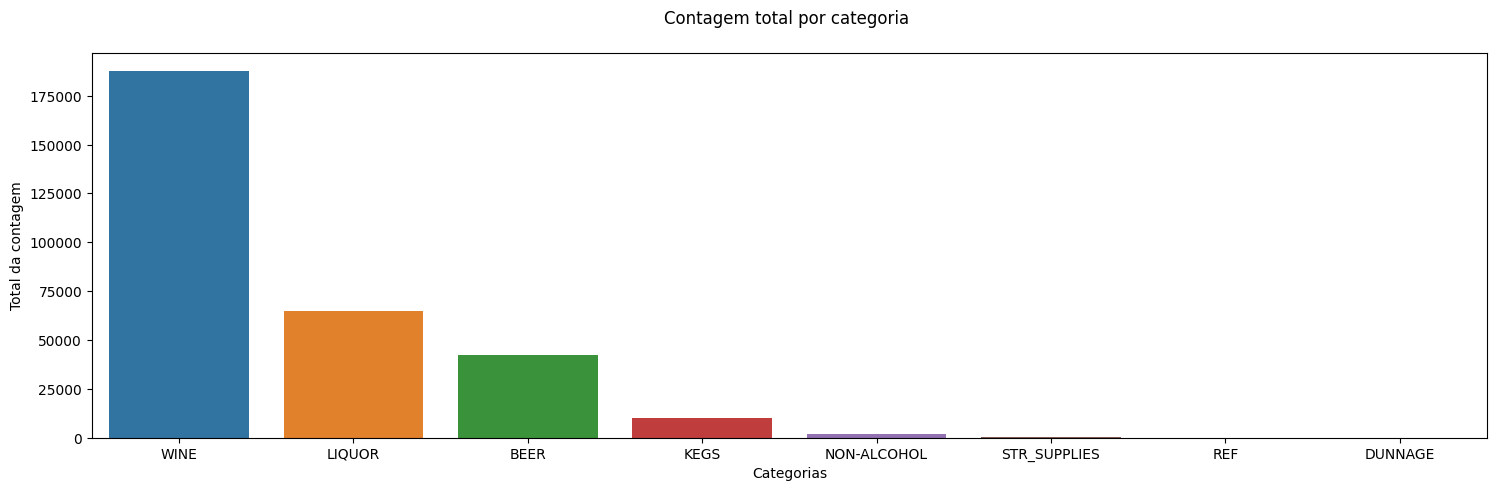

In [11]:
# Visualizando quantidade de categorias de bebidas
ItemCount = df_warehouse["Item_type"].value_counts()

plt.figure(figsize=(18,5))
sn.countplot(df_warehouse['Item_type'],order = df_warehouse['Item_type'].value_counts().index)
plt.title('Contagem total por categoria \n')
plt.ylabel('Total da contagem')
plt.xlabel('Categorias')

**Destaque**
    
Com o conhecimento da contagem total das categorias, podemos criar um ranking para as categorias mais consumidas. Desta forma, destacamos um ranking de top 5 (Vinhos, Licores, Cervejas, Barris e Bebidas não alcólicas), descartando o restante dos dados não relevantes para a pesquisa.

<h2>Maiores fornecedores<h2/>

In [13]:
# quantidade de fornecedores de bedidads disponivel
# neste caso terão 396 fornece
quant_sup = df_warehouse['Supplier'].unique()
print("Number of registered suppliers: ", len(quant_sup))

Number of registered suppliers:  396


In [14]:
# maiores fornecedores de bebidas no ranking top 5 (nlargest = 5 by default)
supp_groupby = df_warehouse.groupby('Supplier').size().nlargest()
supp_groupby

Supplier
REPUBLIC NATIONAL DISTRIBUTING CO       20994
LEGENDS LTD                             13634
SOUTHERN GLAZERS WINE AND SPIRITS       11720
E & J GALLO WINERY                      10816
THE COUNTRY VINTNER, LLC DBA WINEBOW    10669
dtype: int64

In [15]:
# ranking de maiores fornecedores por categoria de bebidas
list_item = ['WINE', 'LIQUOR', 'BEER', 'KEGS', 'NON-ALCOHOL']

print("BEST SUPPLIERS")
print('=====================================')

for i in list_item:
    best_supplier = df_warehouse[df_warehouse['Item_type'] == i]['Supplier'].value_counts()[0:1]
    print(f"Top supplier of {i}: {best_supplier}\n")

print('=====================================')

BEST SUPPLIERS
Top supplier of WINE: Supplier
REPUBLIC NATIONAL DISTRIBUTING CO    16864
Name: count, dtype: int64

Top supplier of LIQUOR: Supplier
DIAGEO NORTH AMERICA INC    6358
Name: count, dtype: int64

Top supplier of BEER: Supplier
LEGENDS LTD    10479
Name: count, dtype: int64

Top supplier of KEGS: Supplier
LEGENDS LTD    2549
Name: count, dtype: int64

Top supplier of NON-ALCOHOL: Supplier
AMERICAN BEVERAGE MARKETERS    416
Name: count, dtype: int64



<h2>Venda de produtos<h2/>

In [16]:
# pequena amostra de bebidas por categoria
groups = df_warehouse.groupby(['Item_type', 'Item_description'])
groups['Item_description'].size().nlargest(10)

Item_type  Item_description                         
WINE       BURGANS ALBARINO - 750ML                     44
           SANTA JULIA TORRONTES SUSTAINABLE - 750ML    39
           LA VIELLE FERME CDV RED - 750ML              35
           LINGANORE BLACK RAVEN - 750ML                34
LIQUOR     MCCLINTOCK HERITAGE WHITE WHISKEY - 750ML    33
           DAVID NICHOLSON 1843 BOURBON -750ML          32
WINE       CA LUNGHETTA P/GRIG - 750ML                  32
           LAS PERDICES VIOG - 750ML                    32
           MARIETTA OV RED - 750ML                      32
           DONA PAULA LOS CARDOS MAL - 750ML            31
Name: Item_description, dtype: int64

In [17]:
# verificando os registros de quantidade vendida de uma determinada bebida
burgans = df_warehouse[df_warehouse['Item_description'] == 'BURGANS ALBARINO - 750ML']
len(burgans)

44

In [18]:
# maiores bebidas vendidas por categoria

big_wine_sold = df_warehouse[df_warehouse['Item_type'] == 'WINE']['Item_description'].value_counts()[0:1]
big_beer_sold = df_warehouse[df_warehouse['Item_type'] == 'BEER']['Item_description'].value_counts()[0:1]
big_liquor_sold = df_warehouse[df_warehouse['Item_type'] == 'LIQUOR']['Item_description'].value_counts()[0:1]
big_kegs_sold = df_warehouse[df_warehouse['Item_type'] == 'KEGS']['Item_description'].value_counts()[0:1]
big_non_alcohol_sold = df_warehouse[df_warehouse['Item_type'] == 'NON-ALCOHOL']['Item_description'].value_counts()[0:1]

print(f"Biggest sold WINE: {big_wine_sold}\n")
print(f"Biggest sold BEER: {big_beer_sold}\n")
print(f"Biggest sold LIQUOR: {big_liquor_sold}\n")
print(f"Biggest sold KEGS: {big_kegs_sold}\n")
print(f"Biggest sold NON-ALCOHOL: {big_non_alcohol_sold}\n")

Biggest sold WINE: Item_description
BURGANS ALBARINO - 750ML    44
Name: count, dtype: int64

Biggest sold BEER: Item_description
CHIMAY CING CENTS WH CAP 4/6NR - 11.2OZ    24
Name: count, dtype: int64

Biggest sold LIQUOR: Item_description
MCCLINTOCK HERITAGE WHITE WHISKEY - 750ML    33
Name: count, dtype: int64

Biggest sold KEGS: Item_description
COORS LT 1/2K    24
Name: count, dtype: int64

Biggest sold NON-ALCOHOL: Item_description
STIRRINGS LEMON DROP COCKTAIL 6/CS - 750ML    25
Name: count, dtype: int64



## Conclusão 

1. Visualização da quantidade de bebidas por categoria
2. Destacando as categorias mais relevantes em vendas (Vinhos, Cervejas, Licores, Barris e Bebidas Não alcólicas)
3. Ranking Top 5 de maiores fornecedores
4. Ranking de maiores fornecedores de bebidas por categoria
5. Maiores bebidas vendidas por categoria

Este projeto conclui uma análise surpeficial dos dados de varejo e vendas de bebidas, sendo apenas destinada para fins didáticos.